# Supervised Learning
We saw a few examples of machine learning algorithms, so at this point it seems like once you get the data ready, machine learning is just "plug and play", but not so fast! 

Let's learn about **regularization**! Regularization is a means by which we can control how much a machine learning algorithm learns. The controlling is done using a parameter that the algorithm, called the **shrinkage parameter**, which is just an argument of the algorithm. The shrinkage parameter is an example of a **hyper-parameter**. A hyper-parameter is like a knob: by specifying a different value for the hyper-parameter, we control how the training happens, a process called **hyper-parameter tuning**. We talk about this is more detail in the next lesson.

We will look at two examples of regularizaiton: LASSO and Ridge regression. Both LASSO and Ridge regression are implementations of linear regression where we try to minimize prediction error plus some penalty that depends on the model's parameters (or coefficients) and the shrinkage constant (`alpha` in the code below). LASSO penalizes the model's parameters using the sum of the **absolute values** of the parameters (this is also called **L1-regularization**), while Ridge does so based on the sum of the **squared values** of the parameters (this is also called **L2-regularization**). For reasons we cannot elaborate on here, **LASSO has the by-product that it also does feature selection**, whereas Ridge doesn't. So not all regularization results in feature selection.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_housing = pd.read_csv("boston-house-prices.csv", skiprows = 1)
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Here's the description of the data:

- `CRIM`: per capita crime rate by town
- `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`: proportion of non-retail business acres per town.
- `CHAS`: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- `NOX`: nitric oxides concentration (parts per 10 million)
- `RM`: average number of rooms per dwelling
- `AGE`: proportion of owner-occupied units built prior to 1940
- `DIS`: weighted distances to five Boston employment centres
- `RAD`: index of accessibility to radial highways
- `TAX`: full-value property-tax rate per \$10,000
- `PTRATIO`: pupil-teacher ratio by town
- `B`: $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of black residents by town
- `LSTAT`: % lower status of the population
- `MEDV`: Median value of owner-occupied homes in $1000's

To see how regularization works, let's return to the model we trained in the lab from the data above.

In [2]:
X = df_housing.drop(columns = 'MEDV')
y = df_housing['MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.416942,0.344513,-1.117966,-0.270395,-0.960137,0.943640,-1.102673,0.654891,-0.523106,-1.144555,-1.601746,0.398294,-1.108176
1,-0.280002,-0.499723,-0.421068,-0.270395,-0.145806,-0.222195,0.832605,0.069475,-0.638367,-0.601866,1.175568,0.448420,0.863237
2,-0.408091,-0.499723,-0.360216,-0.270395,-0.299938,0.679704,0.108207,-0.448063,-0.523106,-0.142668,1.130038,0.434251,-0.678455
3,-0.359270,0.344513,-1.025240,-0.270395,0.171021,1.652175,-0.555824,-0.440721,-0.523106,-0.858301,-2.466811,0.377578,-1.307689
4,-0.000352,-0.499723,1.021988,-0.270395,0.239524,0.017747,-0.580681,0.076309,1.666847,1.539070,0.811330,0.359545,-0.272453


1. Train a linear regression algorithm to predict `MEDV` from the remaining features. 

In [3]:
from sklearn.linear_model import LinearRegression 

clf = LinearRegression()
clf.fit(X_train,y_train)
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)


2. Evaluate the model and report the performance on both training and test data. These numbers will serve as our benchmark performance.

In [1]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train, y_hat_train) ** 0.5
rmse_test = mean_squared_error(y_test, y_hat_test) ** 0.5

print("RMSE on the training data: {:5.5f}.".format(rmse_train))
print("RMSE on the test data: {:5.5f}.".format(rmse_test))

NameError: name 'y_train' is not defined

We now train a regularized version of `LinearRegression` called `Lasso` (you can load it from the same library). `Lasso` has an argument called `alpha`, which is the **shrinkage parameter** we referred to earlier.

3. Let `alpha = 0.000001` and train a `Lasso` algorithm. Show that the resulting model is practically identical to the one we trained with `LinearRegression`. There are different ways to show this, so you will need to think of a way. 

In [5]:
from sklearn.linear_model import Lasso
alpha = 0.000001
clf_lasso = Lasso(alpha)
clf_lasso.fit(X_train,y_train)
y_hat_train_lasso = clf_lasso.predict(X_train)
y_hat_test_lasso = clf_lasso.predict(X_test)

4. Iteratively train a new `Lasso` model, letting `alpha` change each time to one of the values given by `alpha_vals` below, keeping track of the performance on the training and test data each time, and storing the model's coefficients each time (the `coef_` attribute of the trained model). 

To make it easier, we have laid out general layout of the code. You can use this if you want or write your own program.

In [6]:
alpha_vals = np.arange(0.01, 5, .01) # values of alpha we want to iterate over
# this data stores the alpha we tried, and the coefficients (coef) we got for each feature (col)
iter_coefs = pd.DataFrame(columns = ['alpha', 'col', 'coef'])
iter_train_perf = [] # use this to store training data performance for each iteration
iter_test_perf = [] # use this to store test data performance for each iteration

# loop over the alpha values and do this:
for alpha in alpha_vals:
    # fit a model with alpha
    clf_lasso = Lasso(alpha)
    
    # evaluate the model on training and test data
    clf_lasso.fit(X_train,y_train)
    y_hat_train_lasso = clf_lasso.predict(X_train)
    y_hat_test_lasso = clf_lasso.predict(X_test)
    
    # append training performance to iter_train_perf
    rmse_train_lasso = mean_squared_error(y_train, y_hat_train_lasso) ** 0.5
    iter_train_perf.append(rmse_train_lasso)
    
    # append test performance to iter_test_perf
    rmse_test_lasso = mean_squared_error(y_test, y_hat_test_lasso) ** 0.5
    iter_test_perf.append(rmse_test_lasso)
    
    # create a DataFrame storing alpha (repeated), feature name matching coefficient
    alpha_ = [alpha for i in range(len(df_housing.columns.values))]
    new_coef = pd.DataFrame(zip(clf_lasso.coef_, df_housing.columns.values,alpha_),columns = ['coef','col','alpha'])
    
    # append the above DataFrame to iter_coefs
    iter_coefs = iter_coefs.append(new_coef)
iter_coefs.head()

,alpha,col,coef
0,0.01,CRIM,-1.017356
1,0.01,ZN,0.893794
2,0.01,INDUS,0.052857
3,0.01,CHAS,0.701408
4,0.01,NOX,-2.085800


5. Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`. 

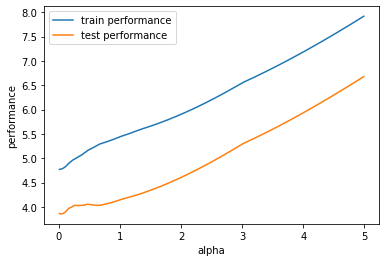

In [7]:
plt.plot(alpha_vals, iter_train_perf, alpha_vals, iter_test_perf)
plt.legend(['train performance','test performance'])
plt.xlabel("alpha")
plt.ylabel("performance")
plt.show()

6. Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`.They should appear to be shrinking toward zero as you increase `alpha`! 

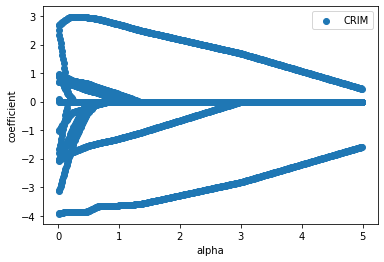

In [8]:
plt.scatter(iter_coefs['alpha'],iter_coefs['coef'])
plt.legend(iter_coefs['col'])
plt.xlabel("alpha")
plt.ylabel("coefficient")
plt.show()

7. `Ridge` and `Lasso` return the same trained model when `alpha = 0.00001` (i.e. close to zero). 

In [9]:
from sklearn.linear_model import Ridge
alpha = 0.00001
clf_ridge = Ridge(alpha)
clf_ridge.fit(X_train,y_train)
y_hat_train_ridge = clf_lasso.predict(X_train)
y_hat_test_ridge = clf_lasso.predict(X_test)

8. Repeat step 4 this time using `Ridge` instead of `Lasso`. We will use the following range for `alpha`: 

In [10]:

alpha_vals = np.arange(0.01, 5, .01) # values of alpha we want to iterate over
# this data stores the alpha we tried, and the coefficients (coef) we got for each feature (col)
iter_coefs_ridge = pd.DataFrame(columns = ['alpha', 'col', 'coef'])
iter_train_perf_ridge = [] # use this to store training data performance for each iteration
iter_test_perf_ridge = [] # use this to store test data performance for each iteration

# loop over the alpha values and do this:
for alpha in alpha_vals:
    # fit a model with alpha
    clf_ridge = Ridge(alpha)
    
    # evaluate the model on training and test data
    clf_ridge.fit(X_train,y_train)
    y_hat_train_ridge = clf_ridge.predict(X_train)
    y_hat_test_ridge = clf_ridge.predict(X_test)
    
    # append training performance to iter_train_perf
    rmse_train_ridge = mean_squared_error(y_train, y_hat_train_ridge) ** 0.5
    iter_train_perf_ridge.append(rmse_train_ridge)
    
    # append test performance to iter_test_perf
    rmse_test = mean_squared_error(y_test, y_hat_test_ridge) ** 0.5
    iter_test_perf_ridge.append(rmse_train_ridge)
    
    # create a DataFrame storing alpha (repeated), feature name matching coefficient
    alpha_ = [alpha for i in range(len(df_housing.columns.values))]
    new_coef = pd.DataFrame(zip(clf_ridge.coef_, df_housing.columns.values,alpha_),columns = ['coef','col','alpha'])
    
    # append the above DataFrame to iter_coefs
    iter_coefs = iter_coefs.append(new_coef)
iter_coefs.head()

,alpha,col,coef
0,0.01,CRIM,-1.017356
1,0.01,ZN,0.893794
2,0.01,INDUS,0.052857
3,0.01,CHAS,0.701408
4,0.01,NOX,-2.085800


9. Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`. 

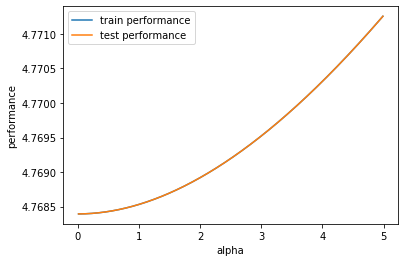

In [11]:
plt.plot(alpha_vals, iter_train_perf_ridge, alpha_vals, iter_test_perf_ridge)
plt.legend(['train performance','test performance'])
plt.xlabel("alpha")
plt.ylabel("performance")
plt.show()

10. Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`.

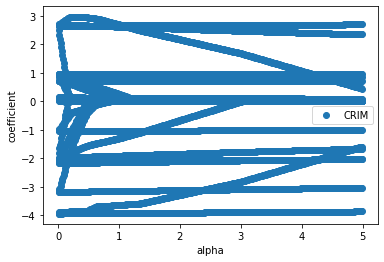

In [12]:
plt.scatter(iter_coefs['alpha'],iter_coefs['coef'])
plt.legend(iter_coefs['col'])
plt.xlabel("alpha")
plt.ylabel("coefficient")
plt.show()

Changing alpha will gradually drop features that arent affect the prediction. 